<a href="https://colab.research.google.com/github/melltl/data_science_courses/blob/main/machine%20learning/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN

"vizinhos mais proximos"

calculo de distancia
pode ser usado para classificacao de regressao
classificacao= detrminar rotulo de um amosta baesada nas amostras vizinhas de um conjunto de treinamento
regressao= determinar um valor de um atributo  a partir de amostras vizinhas de um conjunto de treinamento

dados semelhantes tendem a estar concentrados no mesmo espaço de dispersão
considera a proximidade dos dados para realizxar predições
medidas de distancia ultilizadas: euclidiana




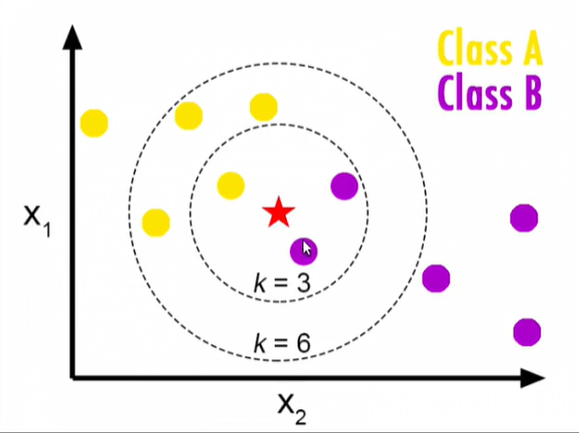

estrela: ponto de dados que queremos classificar
k= especifica quantos vizinhos serao comparados

knn nao gera modelo(baseado em aprendizado de estatistico)
armazena o valor dos dados de treino

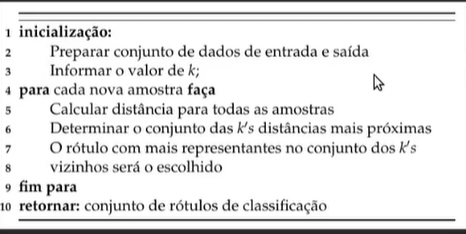

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [3]:
df = pd.read_csv('/content/iris.csv')
df.head()
# 3 diferentes tipos de especies de flores

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#dividir o dado de treino e o dado de teste
from sklearn.model_selection import train_test_split
#primeiro parametro= dados sem o valor de classe
#segundo=valores da classe, apenas atributos especies
#70% sera o conjunto de treino= x_train(4 atributos do df) Y_train(classses do df que vc quer prever)
#30% teste= x_teste,y_teste
X_train,X_test,y_train,y_test=train_test_split(df.drop('Species',axis=1),df['Species'],test_size=0.3)

In [7]:
X_train.shape,X_test.shape

((105, 4), (45, 4))

In [8]:
y_train.shape,y_test.shape

((105,), (45,))

In [9]:
from sklearn.neighbors import KNeighborsClassifier
#n_neighbors = parametro k de distancia
knn=KNeighborsClassifier(n_neighbors=3)

In [10]:
#treinar o algoritmo com os dados passados pelo parametro
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
resultado=knn.predict(X_test)
resultado

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica'], dtype=object)

In [12]:
pd.crosstab(y_test,resultado,rownames=['Real'],colnames=['Predito'],margins=True)

Predito,Iris-setosa,Iris-versicolor,Iris-virginica,All
Real,,,,
Iris-setosa,17,0,0,17
Iris-versicolor,0,12,1,13
Iris-virginica,0,0,15,15
All,17,12,16,45


identificar digitos escritos a mão:

In [14]:
#importando biblioteca que contem imagens de digitis escritos a mao
from sklearn import datasets,svm,metrics
import matplotlib.pyplot as plt

digits=datasets.load_digits()


In [17]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

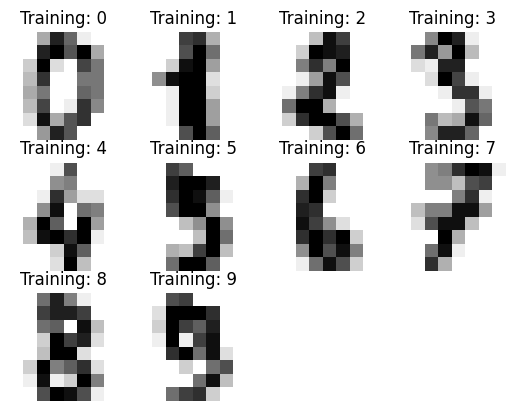

In [18]:
#cada imagem corresponde a seu label
images_and_labels= list(zip(digits.images,digits.target))

#primeiros 10 elementos
for index,(image,label) in enumerate(images_and_labels[:10]):
  plt.subplot(3,4,index+1)
  plt.axis('off')
  plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
  plt.title('Training: %i' % label)

convertendo para datframe

In [24]:
n_samples=len(digits.images)

#cada linha representa uma imagem
data=digits.images.reshape((n_samples,-1))
classe=digits.target


In [21]:
df=pd.DataFrame(data)
df['classe']=classe

In [22]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,classe
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [38]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('classe',axis=1),df['classe'],test_size=0.3)

In [49]:
X_train.shape,X_test.shape

((1257, 64), (540, 64))

In [48]:
y_train.shape,y_test.shape

((1257,), (540,))

In [50]:
knn=KNeighborsClassifier(n_neighbors=3)

In [51]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [52]:
resultado=knn.predict(X_test)

In [53]:
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.96      1.00      0.98        55
           2       1.00      1.00      1.00        59
           3       0.97      0.99      0.98        67
           4       1.00      0.98      0.99        50
           5       1.00      0.98      0.99        57
           6       1.00      1.00      1.00        59
           7       0.96      1.00      0.98        51
           8       1.00      0.96      0.98        45
           9       0.98      0.95      0.96        43

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [54]:
print(pd.crosstab(y_test,resultado,rownames=['Real'],colnames=['           Predito'],margins=True))

           Predito   0   1   2   3   4   5   6   7   8   9  All
Real                                                           
0                   54   0   0   0   0   0   0   0   0   0   54
1                    0  55   0   0   0   0   0   0   0   0   55
2                    0   0  59   0   0   0   0   0   0   0   59
3                    0   0   0  66   0   0   0   1   0   0   67
4                    0   0   0   0  49   0   0   1   0   0   50
5                    0   0   0   0   0  56   0   0   0   1   57
6                    0   0   0   0   0   0  59   0   0   0   59
7                    0   0   0   0   0   0   0  51   0   0   51
8                    0   2   0   0   0   0   0   0  43   0   45
9                    0   0   0   2   0   0   0   0   0  41   43
All                 54  57  59  68  49  56  59  53  43  42  540


cross validation

cross_val_score(estimator, X, y, cv): This function is used to perform cross-validation. It takes several parameters:

estimator: This is the machine learning model or estimator to be evaluated. In this case, it's assumed that knn is already defined as a kNN classifier.
X: This is the feature matrix of the dataset, typically denoted as X.
y: This is the target variable or labels of the dataset.
cv: This parameter determines the cross-validation splitting strategy. In this case, cv=5 specifies 5-fold cross-validation, where the dataset is split into 5 equal-sized folds, and each fold is used as a test set exactly once while the rest serves as the training set.
scores: After running cross-validation, this variable holds the evaluation scores obtained from each fold.

The code evaluates the performance of the kNN classifier using 5-fold cross-validation. It returns an array of scores, where each score represents the performance of the classifier on a particular fold of the data.

In [56]:
from sklearn.model_selection import cross_val_score
#separar os dados de treino e teste de forma interativa
scores=cross_val_score(knn,df.drop('classe',axis=1),df['classe'],cv=5)
scores


array([0.95555556, 0.95833333, 0.96657382, 0.98607242, 0.96657382])

otimizando o k (para saber qual o melhor valor botar)

In [57]:
from sklearn.model_selection import GridSearchCV

In [59]:
#vendo a performance do algoritimo para cada numro(k=1,k=2,k=3...)
k_list=list(range(1,31))
k_values=dict(n_neighbors=k_list)
k_values

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30]}

In [60]:
grid=GridSearchCV(knn,k_values,cv=5,scoring='accuracy')

In [61]:
grid.fit(df.drop('classe',axis=1),df['classe'])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [62]:
grid.cv_results_

{'mean_fit_time': array([0.00362115, 0.00358067, 0.00351014, 0.00393491, 0.00402274,
        0.00351434, 0.00346994, 0.00409217, 0.00345302, 0.00360446,
        0.00348988, 0.00514879, 0.0035995 , 0.00382752, 0.00338802,
        0.00345511, 0.00350308, 0.00386324, 0.00347571, 0.00354028,
        0.003443  , 0.00348177, 0.00341473, 0.00408101, 0.00547175,
        0.00436759, 0.00636654, 0.00490565, 0.00582409, 0.004533  ]),
 'std_fit_time': array([3.02641501e-04, 9.69145688e-05, 1.01092919e-04, 8.43163608e-04,
        1.21915956e-03, 1.28963111e-04, 3.67220342e-05, 1.10820942e-03,
        2.12157707e-05, 2.70498856e-04, 1.52518257e-04, 3.29307955e-03,
        3.09556925e-04, 4.48288010e-04, 4.18522340e-05, 2.46490222e-05,
        1.33355080e-04, 7.12535862e-04, 1.69810637e-04, 1.50544899e-04,
        3.51128327e-05, 5.61779339e-05, 2.80502675e-05, 8.21165934e-04,
        1.26094464e-03, 4.10193078e-04, 2.37234238e-03, 4.01325750e-04,
        1.27478815e-03, 7.10496893e-04]),
 'mean_scor

In [64]:
print(f"Melhor valor de k{grid.best_params_} com o valor {grid.best_score_} de acuracia")

Melhor valor de k{'n_neighbors': 2} com o valor 0.9671711544413494 de acuracia
